In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

from helpers import *

plt.rcParams.update({
    'font.size': 12,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})


In [3]:
# get english (closed) compounds
ladec_compound_path = ''
wiktionary_etym = ''
english_morph_path = 'data/celex2/english/eml/eml.cd'

eng_prefix, eng_suffix, eng_infix = get_affixes(wiktionary_etym, 'eng')
eng_wiki_comps = get_etymology(wiktionary_etym, lang='eng', etym_type='com', uppercase_filter=True)
eng_wiki_comps = {k: v[0] for k, v in eng_wiki_comps.items() if len(v[0]) == 2}

eng_celex_comps = read_celex_compounds(english_morph_path, 11, stopwords_eng, eng_prefix, eng_suffix, True)
eng_celex_comps = {k: v for k, v in eng_celex_comps.items() if len(v) == 2} # only two constituents

eng_ladec_comps = {}
LADEC_table = pd.read_csv(ladec_compound_path)
for i, w in enumerate(LADEC_table['stim']):
    if LADEC_table['isPlural'][i]: continue
    if LADEC_table['correctParse'][i] == 'no': continue
    w1 = LADEC_table['c1'][i]
    w2 = LADEC_table['c2'][i]
    eng_ladec_comps[w] = [w1, w2]

print(len(eng_wiki_comps), len(eng_ladec_comps), len(eng_celex_comps))
print(len(set(eng_wiki_comps.keys()) | set(eng_ladec_comps.keys()) | set(eng_celex_comps.keys())))
    
# print('sarabeth' in eng_wiki_comps)
# print('sarabeth' in eng_ladec_comps)
# print('sarabeth' in eng_celex_comps)

# get combinations from wordnet
wn_combinations = {}
for w in wn.all_lemma_names():
    p = w.split('-')
    if len(p) == 2 and all(u.isalpha() and (not u in stopwords_eng) for u in p):
        wn_combinations[w] = w.split('-')
    p = w.split('_')
    if len(p) == 2 and all(u.isalpha() and (not u in stopwords_eng) for u in p):
        wn_combinations[w] = w.split('_')

print(len(wn_combinations))


43616
19277 5622 6778
26097
53818


In [4]:
# make word lists for descriptive statistics
parse = {}
parse.update(eng_wiki_comps)
parse.update(eng_ladec_comps)
# parse.update(eng_celex_comps)
print(len(parse))

parse_full = wn_combinations.copy()
parse_full.update(parse)
parse = {k: v for k, v in parse.items() if k.isalpha()}
pickle.dump((parse, parse_full), open('data/eng_compounds.pkl', 'wb'))

compound_forms = {w for w in parse}
compound_forms_full = {w for w in parse_full}



21298


In [9]:
k = 30
print(f'total number of (closed) compounds: {len(compound_forms)}\n')

print(f'top {k} head words')
head_count_closed = print_top_words(compound_forms, parse, 1, k)
print('')
print(f'top {k} modifier words')
modifier_count_closed = print_top_words(compound_forms, parse, 0, k)
print('')



total number of (closed) compounds: 21559

top 30 head words
('man', 315) liegeman, dalesman, badman, raftsman, bowman, ...
('work', 272) smithwork, endwork, fanwork, pointwork, swordwork, ...
('fish', 266) coalfish, mousefish, creekfish, balloonfish, sandfish, ...
('head', 256) cockhead, egghead, forehead, brickhead, knothead, ...
('maker', 246) grantmaker, legendmaker, ballmaker, capmaker, causeymaker, ...
('board', 207) offboard, strawboard, wallboard, workboard, boogieboard, ...
('line', 207) broadline, bassline, bankline, soupline, paceline, ...
('house', 203) pithouse, chophouse, clubhouse, milkhouse, showhouse, ...
('making', 199) craftmaking, newsmaking, matmaking, sleevemaking, dealmaking, ...
('wood', 199) redwood, leadwood, spoonwood, dyewood, greenwood, ...
('back', 185) finback, laceback, crookback, goldenback, plugback, ...
('stone', 170) hammerstone, needlestone, soapstone, waterstone, gravestone, ...
('way', 163) areaway, bikeway, truckway, oilway, flyway, ...
('wort', 

In [10]:
k = 30
print(f'total number of (all) compounds: {len(compound_forms_full)}\n')

print(f'top {k} head words')
head_count_full = print_top_words(compound_forms_full, parse_full, 1, k)
print('')
print(f'top {k} modifier words')
modifier_count_full = print_top_words(compound_forms_full, parse_full, 0, k)
print('')



total number of (all) compounds: 79529

top 30 head words
('man', 415) liegeman, dalesman, badman, bowman, pitchman, ...
('line', 389) guide-line, lubber_line, broadline, bassline, log_line, ...
('fish', 359) coalfish, lookdown_fish, sandfish, rudderfish, jugfish, ...
('house', 310) pithouse, showhouse, lighthouse, alms-house, sweathouse, ...
('tree', 310) portia_tree, larch_tree, cacao_tree, plumcot_tree, smoke_tree, ...
('work', 287) smithwork, pointwork, formwork, keywork, rackwork, ...
('head', 285) egghead, forehead, human_head, snake-head, knothead, ...
('maker', 279) grantmaker, legendmaker, causeymaker, sausagemaker, printmaker, ...
('board', 279) offboard, wallboard, composition_board, workboard, boogieboard, ...
('back', 249) finback, crookback, paying_back, plugback, ladder-back, ...
('wood', 235) leadwood, greenwood, rubywood, bearwood, leatherwood, ...
('ball', 226) roulette_ball, matzah_ball, woodball, rugby_ball, racquetball, ...
('acid', 217) ascorbic_acid, ethanedioic_

In [11]:
# get compounds from IDS
closed_ids_comps = pd.read_csv('data/ids_words/comps/ids_eng_comp.csv')
comps_ids = closed_ids_comps['word'].to_list()
parse_ids = {w: (closed_ids_comps['c1'][i], closed_ids_comps['c2'][i]) for i, w in enumerate(comps_ids)}

k = 30
print(f'total number of (closed) ids compounds: {len(comps_ids)}\n')

print(f'top {k} head words')
head_count_ids = print_top_words(comps_ids, parse_ids, 1, k)
print('')
print(f'top {k} modifier words')
modifier_count_ids = print_top_words(comps_ids, parse_ids, 0, k)
print('')


total number of (closed) ids compounds: 83

top 30 head words
('man', 4) herdsman, nobleman, freeman, fisherman
('land', 3) island, mainland, headland
('fly', 3) sandfly, firefly, butterfly
('side', 3) beside, inside, outside
('day', 3) midday, today, yesterday
('tide', 2) lowtide, hightide
('father', 2) grandfather, stepfather
('mother', 2) grandmother, stepmother
('son', 2) grandson, stepson
('daughter', 2) granddaughter, stepdaughter
('wax', 2) beeswax, earwax
('pool', 1) whirlpool
('fall', 1) waterfall
('quake', 1) earthquake
('bow', 1) rainbow
('wood', 1) firewood
('coal', 1) charcoal
('spring', 1) offspring
('men', 1) kinsmen
('stock', 1) livestock
('gull', 1) seagull
('scale', 1) fishscale
('ray', 1) stingray
('roach', 1) cockroach
('hive', 1) beehive
('hopper', 1) grasshopper
('head', 1) forehead
('brow', 1) eyebrow
('lid', 1) eyelid
('lash', 1) eyelash

top 30 modifier words
('grand', 4) grandfather, grandmother, grandson, granddaughter
('step', 4) stepfather, stepmother, step

closed compounds...


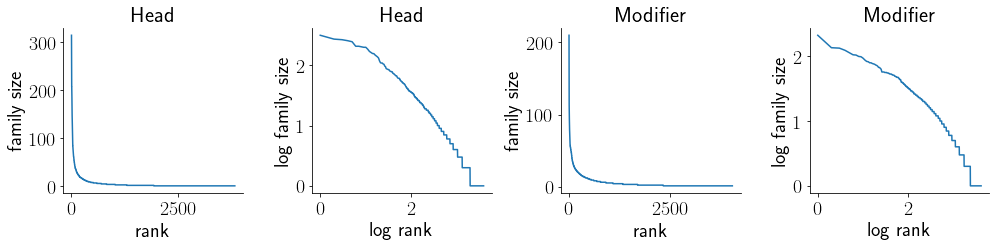

all compounds...


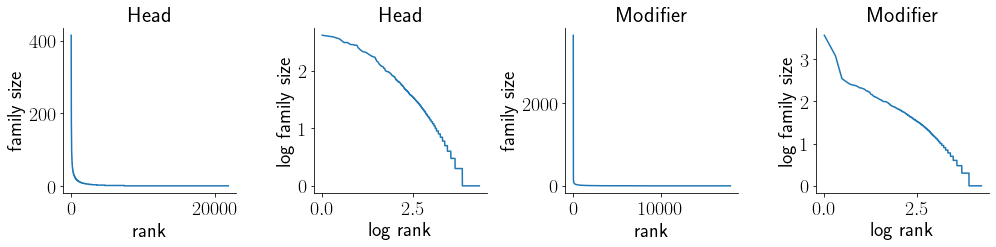

ids closed compounds...


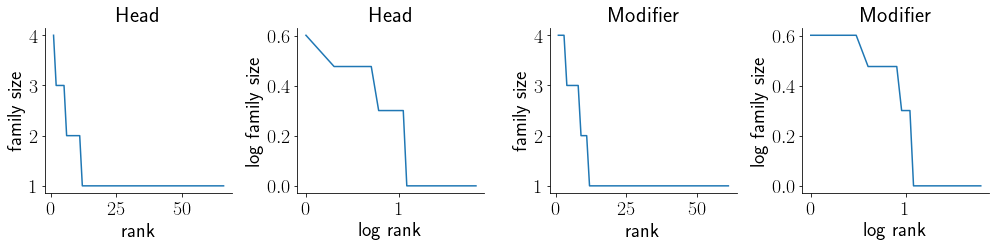

In [12]:
# plot distributions
print('closed compounds...')
fig, axes = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(7*2,3.6))
axes[0:2] = make_rank_plot(axes[0:2], sorted(head_count_closed.keys(), key=lambda w: -head_count_closed[w]), \
                           head_count_closed, 'Head')
axes[2:] = make_rank_plot(axes[2:], sorted(modifier_count_closed.keys(), key=lambda w: -modifier_count_closed[w]), \
                          modifier_count_closed, 'Modifier')
fig.tight_layout()
plt.show()

print('all compounds...')
fig, axes = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(7*2,3.6))
axes[0:2] = make_rank_plot(axes[0:2], sorted(head_count_full.keys(), key=lambda w: -head_count_full[w]), \
                           head_count_full, 'Head')
axes[2:] = make_rank_plot(axes[2:], sorted(modifier_count_full.keys(), key=lambda w: -modifier_count_full[w]), \
                          modifier_count_full, 'Modifier')
fig.tight_layout()
plt.show()

print('ids closed compounds...')
fig, axes = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(7*2,3.6))
axes[0:2] = make_rank_plot(axes[0:2], sorted(head_count_ids.keys(), key=lambda w: -head_count_ids[w]), \
                           head_count_ids, 'Head')
axes[2:] = make_rank_plot(axes[2:], sorted(modifier_count_ids.keys(), key=lambda w: -modifier_count_ids[w]), \
                          modifier_count_ids, 'Modifier')
fig.tight_layout()
plt.show()



